In [1]:
import pandas as pd
from openpyxl import load_workbook
wb = load_workbook('Email_Analytics.xlsx')
ws = wb['email_info']


In [2]:
df = pd.DataFrame(ws.values)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Date,Month,Year,Day,Time,From (Sender),From (Email ID),Subject,Sent/Received,Category
1,Jul,2020,07:10:51,18,+0100,itservicedesk@tcd.ie,itservicedesk@tcd.ie,IT Services | Status update for Trinity comput...,Received,Inbox
2,17,Jul,2020,Fri,23:11:05,Gmail Team,mail-noreply@google.com,Get the official Gmail app,Received,Inbox
3,17,Jul,2020,Fri,23:11:05,Gmail Team,mail-noreply@google.com,Tips for using your new inbox,Received,Inbox
4,20,Jul,2020,Mon,15:41:07,Helen Shenton,Helen.Shenton@tcd.ie,Update on phased resumption of Library activities,Received,Inbox


In [4]:
df.rename(columns=df.iloc[0], inplace = True)

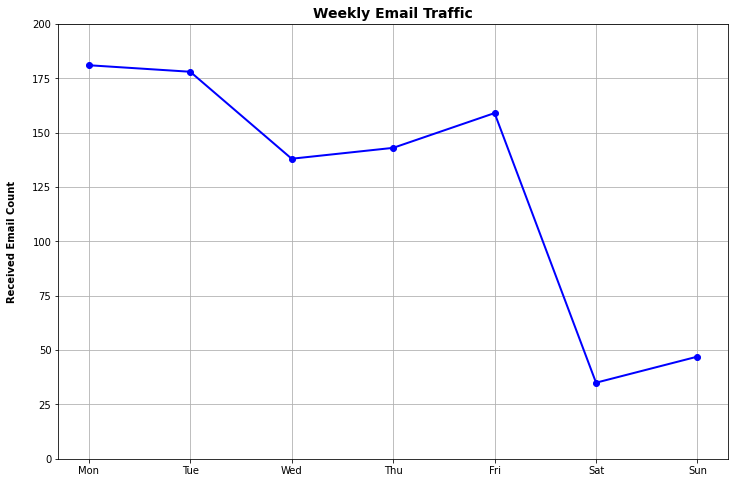

In [5]:
import matplotlib.pyplot as plt
#arrange the categories in the correct order
df['Day'] = pd.Categorical(df['Day'], categories= ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],ordered=True)

# sort by day of the week
count_sorted_by_day = df['Day'].value_counts().sort_index()

plt.figure(figsize=(12,8))
count_sorted_by_day.plot(marker = 'o', color = 'blue', linewidth = 2, ylim = [0,200])
plt.title('Weekly Email Traffic', fontweight = 'bold' ,fontsize = 14)
plt.ylabel("Received Email Count", fontweight = 'bold', labelpad = 15)
plt.grid()

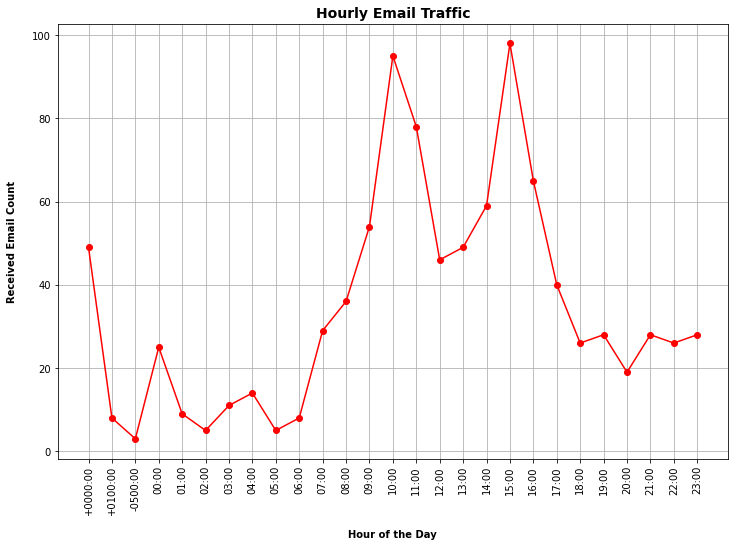

In [6]:
plt.figure(figsize=(12,8))
received = df[df['Sent/Received'] == 'Received']

# splitting only the hour portion in the time column
hour = received['Time'].str.split(':').str[0] + ':00'

# sort by hour of the day - using sort_index for numeric sort
count_sorted_by_hour = hour.value_counts().sort_index()

count_sorted_by_hour.plot(marker = 'o', color = 'red')
plt.title('Hourly Email Traffic', fontsize = 14, fontweight = 'bold')
plt.ylabel("Received Email Count", fontweight = 'bold', labelpad = 15)
plt.xlabel("Hour of the Day", fontweight = 'bold', labelpad = 15)
plt.xticks(range(len(count_sorted_by_hour.index)), count_sorted_by_hour.index)
plt.xticks(rotation=90)
plt.grid()

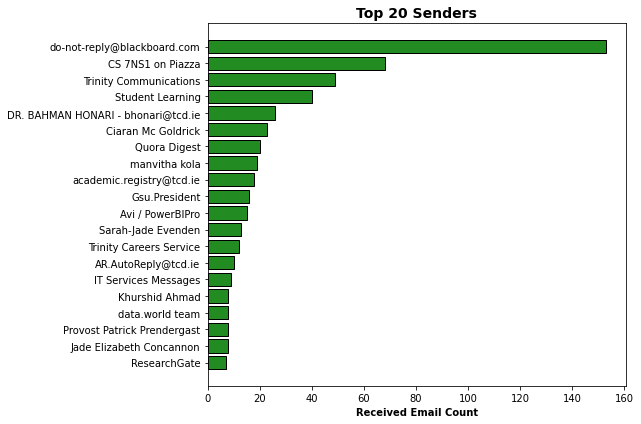

In [7]:
# extract the sender names and their frequencies of occurence
sender_top_20 =  received['From (Sender)'].value_counts().nlargest(20)
sender_top_20_count = sender_top_20.values
sender_top_20_names = sender_top_20.index.tolist()

plt.figure(figsize=(9,6))
plt.barh(sender_top_20_names, sender_top_20_count, color = 'forestgreen', ec = 'black', linewidth = 1.0)
plt.gca().invert_yaxis()
plt.title('Top 20 Senders', fontsize = 14 ,fontweight = 'bold')
plt.xlabel('Received Email Count', fontweight = 'bold')
plt.tight_layout()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Subject Word Count Histogram')

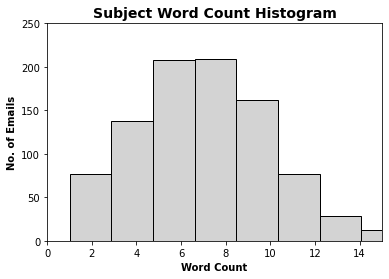

In [8]:
df['Subject Word Count'] = df['Subject'].str.split(' ').str.len()

plt.figure()
plt.hist(df['Subject Word Count'], bins=15, color = 'lightgrey', ec = 'black')
plt.axis([0, 15, 0, 250])
plt.xlabel('Word Count', fontweight = 'bold')
plt.ylabel('No. of Emails', fontweight = 'bold')
plt.title('Subject Word Count Histogram', fontsize = 14, fontweight = 'bold')

Text(0.5, 0, 'Occurrences')

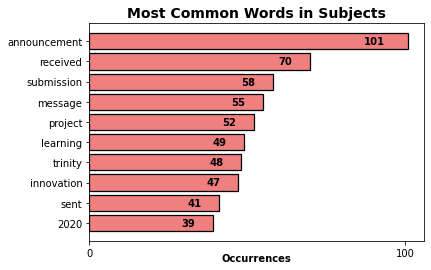

In [9]:
from collections import Counter
# split the subject line into words and store them as a list
word_list_2d = df['Subject'].str.split(' ').fillna('none').tolist()
word_list = [word.lower() for list in word_list_2d for word in list]

# exclude common words and words with three or lesser letters
exclude_list = ['this', 'that', 'your', 'with', 'from','it','there','is']
word_list = [word for word in word_list if word not in exclude_list and len(word)>3]

# extract common words in subject lines and their frequencies of occurrence
common_words_map = Counter(word_list).most_common(10)
common_words = [pair[0] for pair in common_words_map]
frequency = [pair[1] for pair in common_words_map]

plt.figure()
plt.barh(common_words, frequency, color = 'lightcoral', ec = 'black', linewidth = 1.25)
plt.gca().invert_yaxis()
plt.title('Most Common Words in Subjects', fontsize = 14 ,fontweight = 'bold')
y = 0.15
for i in range(len(frequency)):
    if len(str(frequency[i])) == 3:
        x = frequency[i] - 14
    else:
        x = frequency[i] - 10
    plt.text(x,y,frequency[i], fontsize = 10,fontweight = 'bold')
    y = y + 1
plt.xticks([0,100])
plt.xlabel('Occurrences', fontweight = 'bold', labelpad=-5)